In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


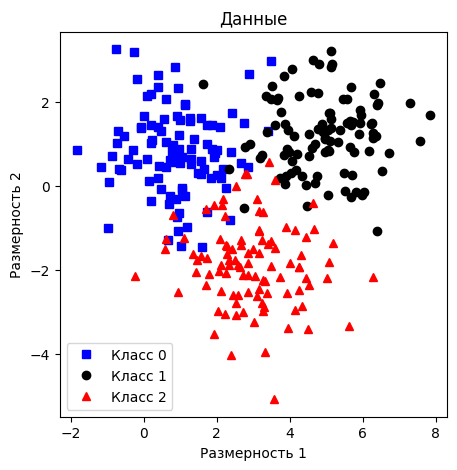

RuntimeError: Found dtype Long but expected Float

In [40]:
# Импорт библиотек
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Генерация данных
nPerClust = 100
blur = 1
A = [1, 1]
B = [5, 1]
C = [3, -2]

# Создание данных для трёх классов
a = [A[0] + np.random.randn(nPerClust) * blur, A[1] + np.random.randn(nPerClust) * blur]
b = [B[0] + np.random.randn(nPerClust) * blur, B[1] + np.random.randn(nPerClust) * blur]
c = [C[0] + np.random.randn(nPerClust) * blur, C[1] + np.random.randn(nPerClust) * blur]

# Объединение данных и меток
data_np = np.hstack((a, b, c)).T
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1)), 1 + np.ones((nPerClust, 1))))

# Конвертация данных в тензоры PyTorch
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# Визуализация данных
plt.figure(figsize=(5, 5))
plt.plot(data[labels == 0, 0], data[labels == 0, 1], 'bs', label='Класс 0')
plt.plot(data[labels == 1, 0], data[labels == 1, 1], 'ko', label='Класс 1')
plt.plot(data[labels == 2, 0], data[labels == 2, 1], 'r^', label='Класс 2')
plt.title('Данные')
plt.xlabel('Размерность 1')
plt.ylabel('Размерность 2')
plt.legend()
plt.show()


# b = stats.zscore(b)
a = a- np.mean(a)/np.std(a)
b = b- np.mean(b)/np.std(b)
# Создание модели нейронной сети

ANNclassify = nn.Sequential(
    nn.Linear(2, 16),
    nn.BatchNorm1d(16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.BatchNorm1d(1),
    nn.Sigmoid()
)
lossfun = nn.BCELoss()
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=0.01)

# Тестирование модел


# Тренировка модели
numepochs = 10000
losses = []
accuracies = []

for epochi in range(numepochs):
    # Прямой проход
    yHat = ANNclassify(data)
    loss = lossfun(tensor(yHat), labels)
    losses.append(loss.item())

    # Обратное распространение и оптимизация
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Вычисление точности
    matches = torch.argmax(yHat, axis=1) == labels
    accuracy = 100 * torch.mean(matches.float())
    accuracies.append(accuracy.item())

# Визуализация потерь и точности
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.title('Потери во время тренировки')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.xlabel('Эпоха')
plt.ylabel('Точность (%)')
plt.title('Точность во время тренировки')

plt.show()

# Итоговая точность
print(f'Итоговая точность: {accuracies[-1]:.2f}%')



In [25]:

# b = stats.zscore(b)
a = a- np.mean(a)/np.std(a)
b = b- np.mean(b)/np.std(b)

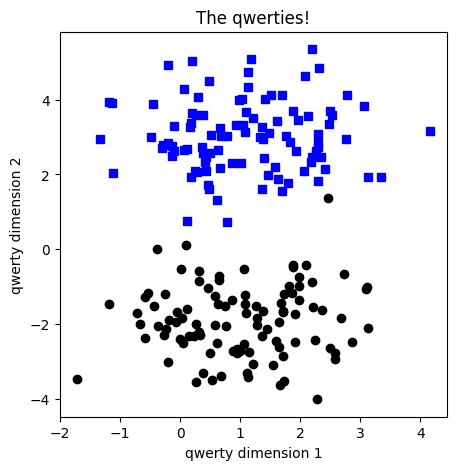

In [24]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [35]:
def createANNmodel(learningRate):
    ANNclassify = nn.Sequential(
        nn.Linear(2, 16),
        nn.BatchNorm1d(16),
        nn.ReLU(),
        nn.Linear(16, 1),
        nn.BatchNorm1d(1),
        nn.Sigmoid()
    )
    lossfun = nn.BCELoss()
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)
    return ANNclassify, lossfun, optimizer


In [33]:
numepochs = 1000
def trainTheModel(ANNmodel):
    losses = torch.zeros(numepochs)
    for epochi in range(numepochs):
        yHat = ANNmodel(data)
        loss = lossfun(yHat, labels)
        losses[epochi] = loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    predictions = ANNmodel(data)
    totalacc = 100 * torch.mean(((predictions > 0.5) == labels).float())
    return losses, predictions, totalacc


In [34]:
ANNclassify, lossfun, optimizer = createANNmodel(0.01)
losses, predictions, totalacc = trainTheModel(ANNclassify)
print('Final accuracy: %g%%' % totalacc)
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


RuntimeError: running_mean should contain 1 elements not 16

In [36]:
import json

# JSON-код
notebook_json = {
    "nbformat": 4,
    "nbformat_minor": 0,
    "metadata": {
        "colab": {
            "name": "DUDL_ANN_codeChallengeQwerties.ipynb",
            "provenance": [{"file_id": "1YpHocGI4rApOxIBb1ZghCU5L-hFnv4CK", "timestamp": 1619331131782}],
            "collapsed_sections": [],
            "authorship_tag": "ABX9TyNyqevL6vPNW79RM1uTontq"
        },
        "kernelspec": {"name": "python3", "display_name": "Python 3"}
    },
    "cells": [
        {"cell_type": "markdown", "metadata": {"id": "bhWV8oes-wKR"}, "source": ["# COURSE: A deep understanding of deep learning\n", "## SECTION: ANNs\n", "### LECTURE: CodeChallenge: more qwerties!\n", "#### TEACHER: Mike X Cohen, sincxpress.com\n", "##### COURSE URL: udemy.com/course/dud/?couponCode=202108"]},
        {"cell_type": "code", "metadata": {"id": "YeuAheYyhdZw"}, "source": ["# import libraries\n", "import numpy as np\n", "import torch\n", "import torch.nn as nn\n", "\n", "import matplotlib.pyplot as plt\n", "from IPython import display\n", "display.set_matplotlib_formats('svg')"], "execution_count": None, "outputs": []},
        {"cell_type": "markdown", "metadata": {"id": "GBzskQUd2RK0"}, "source": ["# Import and process the data"]},
        {"cell_type": "code", "metadata": {"id": "MU7rvmWuhjud"}, "source": ["# create data\n", "\n", "nPerClust = 100\n", "blur = 1\n", "\n", "A = [  1,  1 ]\n", "B = [  5,  1 ]\n", "C = [  3, -2 ]\n", "\n", "# generate data\n", "a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]\n", "b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]\n", "c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]\n", "\n", "# true labels\n", "labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),1+np.ones((nPerClust,1))))\n", "\n", "# concatenate into a matrix\n", "data_np = np.hstack((a,b,c)).T\n", "\n", "# convert to a pytorch tensor\n", "data = torch.tensor(data_np).float()\n", "labels = torch.squeeze(torch.tensor(labels_np).long())\n", "\n", "# show the data\n", "fig = plt.figure(figsize=(5,5))\n", "plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')\n", "plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')\n", "plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^')\n", "plt.title('The qwerties!')\n", "plt.xlabel('qwerty dimension 1')\n", "plt.ylabel('qwerty dimension 2')\n", "plt.show()"], "execution_count": None, "outputs": []},
        {"cell_type": "markdown", "metadata": {"id": "ZwusZlcu2VVS"}, "source": ["# Create the ANN model"]},
        {"cell_type": "code", "metadata": {"id": "v0JMIGb1iV_9"}, "source": ["# model architecture\n", "ANNq = nn.Sequential(\n", "    nn.Linear(2,4),    # input layer\n", "    nn.ReLU(),         # activation unit\n", "    nn.Linear(4,3),    # output units\n", "    nn.Softmax(dim=1), # final activation unit\n", "      )\n", "\n", "# loss function\n", "lossfun = nn.CrossEntropyLoss()\n", "\n", "# optimizer\n", "optimizer = torch.optim.SGD(ANNq.parameters(),lr=.01)"], "execution_count": None, "outputs": []},
        {"cell_type": "code", "metadata": {"id": "YcvZpU6_rUGO"}, "source": ["# test the model\n", "yHat = ANNq(data)\n", "\n", "print(data.shape)\n", "print(yHat.shape)"], "execution_count": None, "outputs": []},
        {"cell_type": "markdown", "metadata": {"id": "OPJl5Fzw2Xgy"}, "source": ["# Train the model"]},
        {"cell_type": "code", "metadata": {"id": "cVD1nFTli7TO"}, "source": ["numepochs = 10000\n", "\n", "# initialize losses\n", "losses = torch.zeros(numepochs)\n", "ongoingAcc = []\n", "\n", "# loop over epochs\n", "for epochi in range(numepochs):\n", "\n", "  # forward pass\n", "  yHat = ANNq(data)\n", "\n", "  # compute loss\n", "  loss = lossfun(yHat,labels)\n", "  losses[epochi] = loss\n", "\n", "  # backprop\n", "  optimizer.zero_grad()\n", "  loss.backward()\n", "  optimizer.step()\n", "\n", "  # compute accuracy\n", "  matches = torch.argmax(yHat,axis=1) == labels # booleans (false/true)\n", "  matchesNumeric = matches.float()              # convert to numbers (0/1)\n", "  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100 \n", "  ongoingAcc.append( accuracyPct )              # add to list of accuracies\n", "\n", "# final forward pass\n", "predictions = ANNq(data)\n", "  \n", "predlabels = torch.argmax(predictions,axis=1)\n", "totalacc = 100*torch.mean((predlabels == labels).float())"], "execution_count": None, "outputs": []},
        {"cell_type": "markdown", "metadata": {"id": "-xa3RWuZ2adq"}, "source": ["# Visualize the results"]},
        {"cell_type": "code", "metadata": {"id": "JYouZAY4i3jM"}, "source": ["# report accuracy\n", "print('Final accuracy: %g%%' %totalacc)\n", "\n", "fig,ax = plt.subplots(1,2,figsize=(13,4))\n", "\n", "ax[0].plot(losses.detach())\n", "ax[0].set_ylabel('Loss')\n", "ax[0].set_xlabel('epoch')\n", "ax[0].set_title('Losses')\n", "\n", "ax[1].plot(ongoingAcc)\n", "ax[1].set_ylabel('accuracy')\n", "ax[1].set_xlabel('epoch')\n", "ax[1].set_title('Accuracy')\n", "plt.show()"], "execution_count": None, "outputs": []},
        {"cell_type": "code", "metadata": {"id": "St6NI4qBk4tO"}, "source": ["# confirm that all model predictions sum to 1\n", "torch.sum(yHat,axis=


SyntaxError: unterminated string literal (detected at line 28) (<ipython-input-36-1f236bd26213>, line 28)